**19360859053 HÜMEYRA ÇİMEN**


> BURSA TEKNİK UNİVERSİTESİ BİLGİSAYAR MÜHENDİSLİĞİ BÖLÜMÜ BİOINFORMATİK DERSİ PROJE-6 RAPOR 


Grafik oluşturma
Düğümsüz ve kenarsız boş bir grafik oluşturun.



In [43]:
import networkx as nx
G = nx.Graph()

In [44]:
print(G)
# Çıktı: Graph()

print(type(G))
# Çıktı: <class 'networkx.classes.graph.Graph'>


Graph with 0 nodes and 0 edges
<class 'networkx.classes.graph.Graph'>


Düğümler

In [45]:
G.add_node(1) # 1 NODE DÜĞÜM EKLENDI
print(G)

Graph with 1 nodes and 0 edges


In [46]:
G.add_nodes_from([2, 3])
print(G)

Graph with 3 nodes and 0 edges


In [47]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(G) # 4 VE 5 EKLENDI

Graph with 5 nodes and 0 edges


Bir grafikteki düğümler başka bir grafiğe dahil edilebilir:

In [48]:
print("G: ",G)
H = nx.path_graph(10)
#H grafiğinin düğümleri G grafiğine ekleni
G.add_nodes_from(H)
print("G: ",G)
print("H: ",H)

G:  Graph with 5 nodes and 0 edges
G:  Graph with 10 nodes and 0 edges
H:  Graph with 10 nodes and 9 edges


In [49]:
G.add_node(H)
print("G: ",G)
#nx.draw(G, with_labels=True)
#plt.show()

G:  Graph with 11 nodes and 0 edges


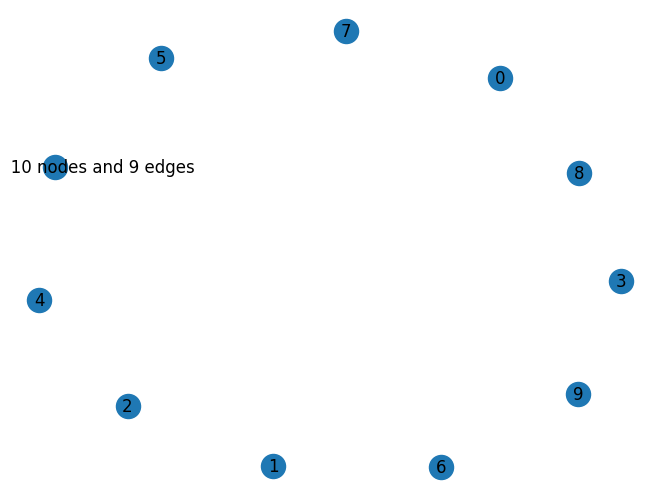

In [50]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()

**Edges**

In [51]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
print(G)

Graph with 11 nodes and 2 edges


In [52]:
G.add_edges_from([(1, 2), (1, 3)])

In [53]:
G.add_edges_from(H.edges)

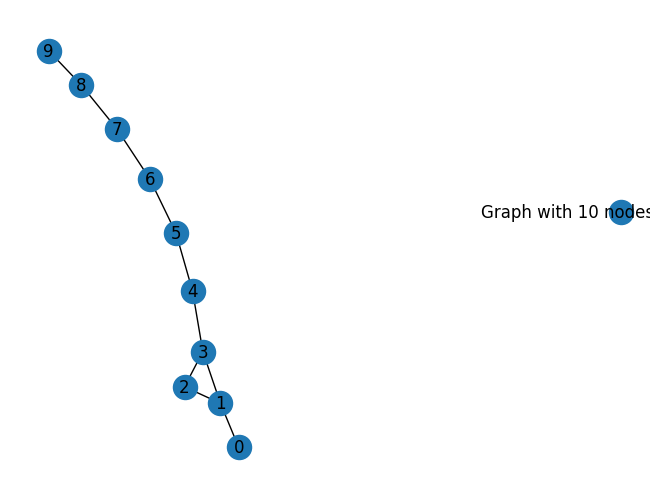

In [54]:
nx.draw(G, with_labels=True)
plt.show()

In [55]:
G.clear()

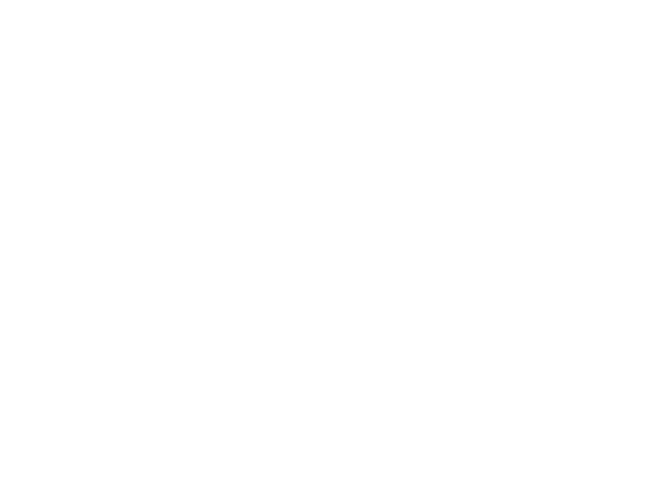

In [56]:
nx.draw(G, with_labels=True)
plt.show()

In [57]:
G.add_edges_from([(1, 2), (1, 3)])# 1 İLE 2 VE 3 BAGLI
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')


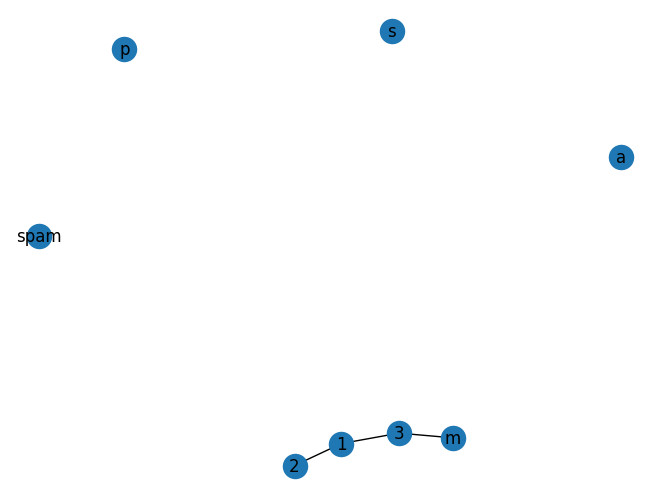

In [58]:
nx.draw(G, with_labels=True)
plt.show()

In [59]:
G.number_of_nodes() # 1/2/3/m/s/p/a/spam 

8

In [60]:
G.number_of_edges() # 3.m/ 1.3/ 1.2 

3

In [61]:
DG = nx.DiGraph() # bir yönlü graf oluşturulur.
DG.add_edge(2, 1)   # adds the nodes in order 2, 1** 2'den 1'e yönlü bir bağlantı ekleni
DG.add_edge(1, 3) # 1'den 3'e yönlü bir bağlantı eklen
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4] #2 düğümünden hangi düğümlere bağlantılar olduğunu kontrol edilir
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)] #2 düğümünden hangi düğümlere bağlantılar olduğunu kontrol edilir

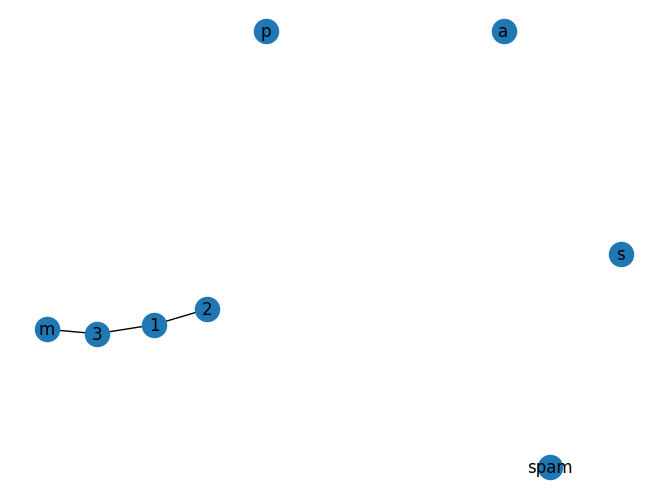

In [62]:
nx.draw(G, with_labels=True)
plt.show()

Examining elements of a graph

In [63]:
list(G.nodes)


[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [64]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [65]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [66]:
G.degree[1]  # the number of edges incident to 1

2

In [67]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [68]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

Removing elements from a graph


In [69]:
G.remove_node(2)


In [70]:
G.remove_nodes_from("spam")

In [71]:
list(G.nodes)

[1, 3, 'spam']

In [72]:
G.remove_edge(1, 3)

Using the graph constructors

In [73]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [74]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [75]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

Accessing edges and neighbors

In [76]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [77]:
G[1][2]

{'color': 'yellow'}

In [78]:
G.edges[1, 2]

{'color': 'yellow'}

In [79]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [80]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [81]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


Graph attributes

In [82]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [83]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

Node attributes

In [84]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [85]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Edge Attributes

In [92]:
G.add_edge(1, 2, weight=4.7 ) #ağırlıklı bir kenar ekler ve bu kenar 1 ve 2 düğümleri arasındadır. Kenarın ağırlığı 4.7 olarak belirtilir.
G.add_edges_from([(3, 4), (4, 5)], color='red') # 3 ve 4 düğümleri arasında iki kırmızı renkli kenar ekler.
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})]) #1 ve 2 düğümleri arasındaki bir mavi renkli kenar ve 2 ve 3 düğümleri arasındaki bir 8 ağırlığındaki kenar ekler.
G[1][2]['weight'] = 4.7  # 1 ve 2 düğümleri arasındaki kenarın ağırlığı 4.7 olarak güncellenir.
G.edges[3, 4]['weight'] = 4.2 # 3 ve 4 düğümleri arasındaki kenarın ağırlığı 4.2 olarak güncelleni


Directed graphs

In [96]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')


0.5

In [97]:
DG.degree(1, weight='weight')

1.25

In [98]:
list(DG.successors(1))

[2]

In [99]:
list(DG.neighbors(1))

[2]

In [100]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G


Multigraphs

In [101]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [102]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)


In [103]:
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

Graph generators and graph operations

3. Using a (constructive) generator for a classic graph, e.g

In [104]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

4. Using a stochastic graph generator, e.g,

In [105]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

5. Reading a graph stored in a file using common graph formats

In [106]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

Analyzing graphs

In [107]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [108]:
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [109]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [110]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

Drawing graphs

In [111]:
import matplotlib.pyplot as plt

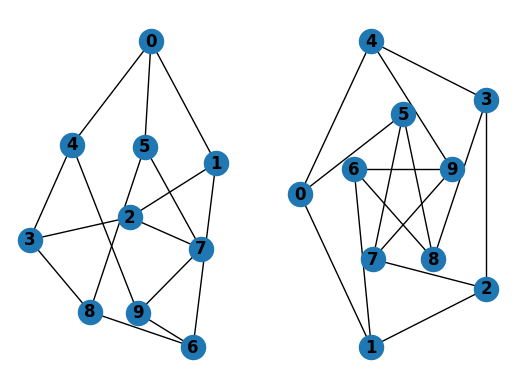

In [112]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [113]:
plt.show() 

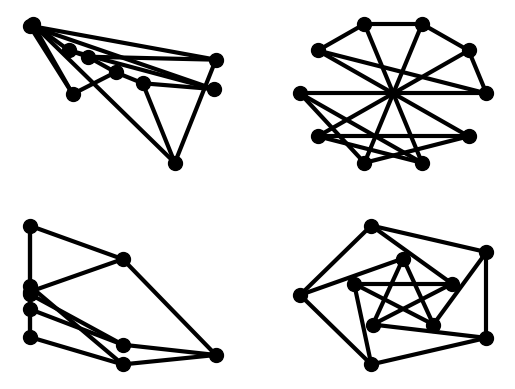

In [114]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

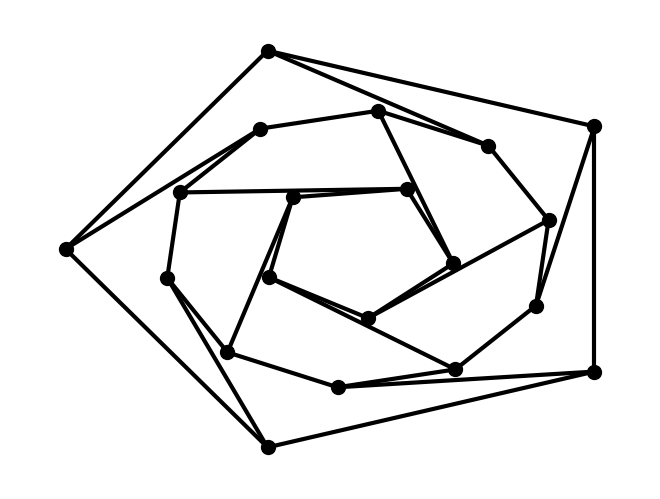

In [115]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

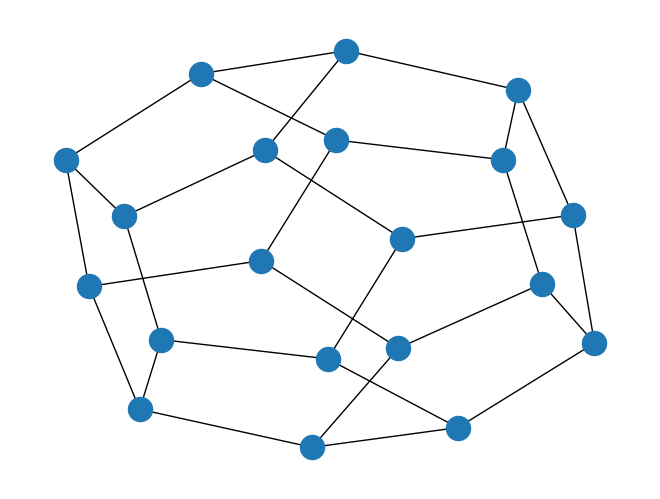

In [116]:
nx.draw(G)
plt.savefig("path.png")

In [126]:
!sudo apt-get install graphviz graphviz-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-3build2).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd6

In [127]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygraphviz-1.10.zip (120 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.10-cp310-cp310-linux_x86_64.whl size=184054 sha256=b416c0e7e9765a36aa921837c6d7db6f730d672207e5d016029efbab28b104a8
  Stored in directory: /root/.cache/pip/wheels/e9/50/02/d9d68f6c947a928e517d5cd9af0ab007c1274fdba95fa9cbe3
Successfully built pygraphviz


file.dot uzantılı dosyayı açmak için eklentiler eklendi


In [130]:
!sudo dnf install graphviz graphviz-devel


sudo: dnf: command not found


In [131]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


file.dot dosyasının içeriğinin görüntülenmesi


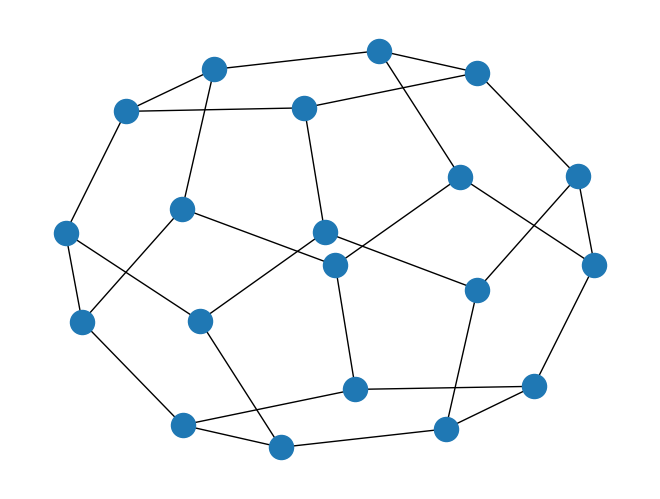

In [132]:

from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')


ÇALIŞTIRILAN KODLARIN ÇIKTILARIN GÖSTERİLMESİ 

1  path.png çıktısının gösterilmesi (ÇIKTILARI KOD İLE GÖSTERDİM)

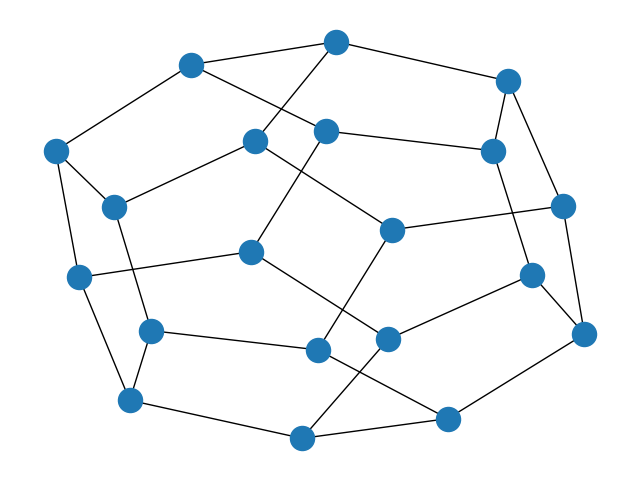

In [133]:
from PIL import Image

# png dosyasının yolu ve adı
image_path = "/content/path.png"

# dosyayı açma
im = Image.open(image_path)

# görüntüyü ekranda gösterme
im.show()


path.to.file dosyasının gösterilmesi 

In [138]:
with open("/content/path.to.file", "r") as f:
    content = f.read()
print(content)



graph [
  node [
    id 0
    label "0"
  ]
  node [
    id 1
    label "1"
  ]
  node [
    id 2
    label "2"
  ]
  node [
    id 3
    label "3"
  ]
  node [
    id 4
    label "4"
  ]
  node [
    id 5
    label "5"
  ]
  node [
    id 6
    label "6"
  ]
  node [
    id 7
    label "7"
  ]
  node [
    id 8
    label "8"
  ]
  node [
    id 9
    label "9"
  ]
  node [
    id 10
    label "10"
  ]
  node [
    id 11
    label "11"
  ]
  node [
    id 12
    label "12"
  ]
  node [
    id 13
    label "13"
  ]
  node [
    id 14
    label "14"
  ]
  node [
    id 15
    label "15"
  ]
  node [
    id 16
    label "16"
  ]
  node [
    id 17
    label "17"
  ]
  node [
    id 18
    label "18"
  ]
  node [
    id 19
    label "19"
  ]
  node [
    id 20
    label "20"
  ]
  node [
    id 21
    label "21"
  ]
  node [
    id 22
    label "22"
  ]
  node [
    id 23
    label "23"
  ]
  node [
    id 24
    label "24"
  ]
  node [
    id 25
    label "25"
  ]
  node [
    id 26
    l